[View in Colaboratory](https://colab.research.google.com/github/itsSKG/DrAIvex/blob/master/Project2.ipynb)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [78]:
! pip install pydrive
# these classes allow you to request the Google drive API
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth 
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id_train = '106NKNFoaR4RM690elN6_zuLWubpba4TQ'
file_id_testX = '1feGQO_rsRaplh9thTMBPESWtHvBLymHL'
file_id_testY = '1hap9oraPBrvRTuh9FgdUJ0rSEuZsnIJ2'
downloaded_train = drive.CreateFile({'id': file_id_train})
downloaded_testX = drive.CreateFile({'id': file_id_testX})
downloaded_testY = drive.CreateFile({'id': file_id_testY})

# allows you to temporarily load your file in the notebook VM

# assume the file is called file.csv and it's located at the root of your drive
downloaded_train.GetContentFile('file_train.csv')
downloaded_testX.GetContentFile('file_testX.csv')
downloaded_testY.GetContentFile('file_testY.csv')


# https://drive.google.com/file/d/106NKNFoaR4RM690elN6_zuLWubpba4TQ/view?usp=sharing --> train
# https://drive.google.com/file/d/1feGQO_rsRaplh9thTMBPESWtHvBLymHL/view?usp=sharing --> test_X
# https://drive.google.com/file/d/1hap9oraPBrvRTuh9FgdUJ0rSEuZsnIJ2/view?usp=sharing --> test_Y

In [0]:
train = pd.read_csv('file_train.csv')
testX = pd.read_csv('file_testX.csv')
testY = pd.read_csv('file_testY.csv')

In [80]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [82]:
testX.describe(include = "all")
testY.describe()

,PassengerId,Survived
count,358.000000,358.000000
mean,1070.500000,0.354749
std,103.489935,0.479107
min,892.000000,0.000000
25%,981.250000,0.000000
50%,1070.500000,0.000000
75%,1159.750000,1.000000
max,1249.000000,1.000000


In [83]:
pd.isnull(train).sum()

# to much data from 'Cabin' missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


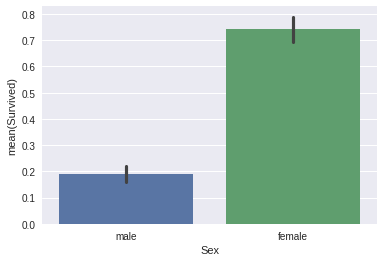

In [84]:
# Data Visualization

sns.barplot(x="Sex", y="Survived", data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


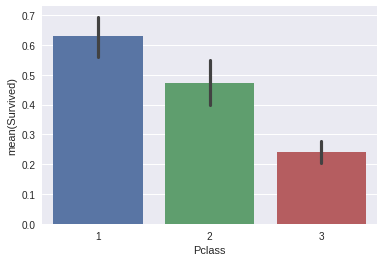

In [85]:
sns.barplot(x="Pclass", y="Survived", data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


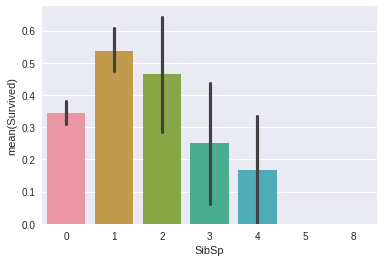

In [86]:
sns.barplot(x="SibSp", y="Survived", data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


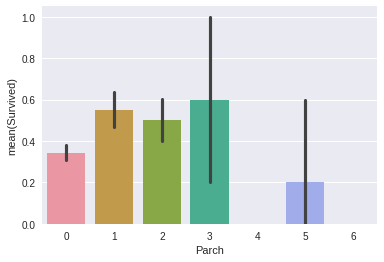

In [87]:
sns.barplot(x="Parch", y="Survived", data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


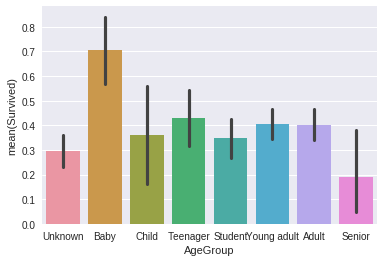

In [88]:
train["Age"] = train["Age"].fillna(-0.5)
testX["Age"] = testX["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, 77]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
testX['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)

sns.barplot(x="AgeGroup", y="Survived", data=train)

# sab mar jaege, bache bach jaege

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


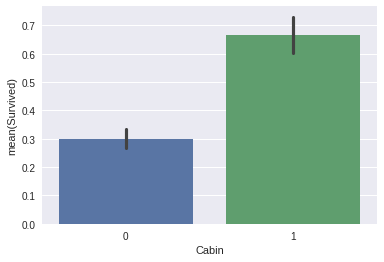

In [89]:
train["Cabin"] = (train["Cabin"].notnull().astype('int'))
testX["Cabin"] = (testX["Cabin"].notnull().astype('int'))
sns.barplot(x="Cabin", y="Survived", data=train)

In [93]:
df = pd.concat([testX, testY], axis = 1)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,PassengerId,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,Student,892,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,Adult,893,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,Young adult,894,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,Young adult,895,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,Young adult,896,1


In [0]:
# sns.barplot(x="Embarked", y="Survived", data = df)

In [70]:
df.describe(include = "all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,PassengerId,Survived
count,358.000000,358.00000,358,358,358.000000,358.000000,358.000000,358,357.000000,358.000000,358,358,358.000000,358.000000
unique,NaN,NaN,358,2,NaN,NaN,NaN,318,NaN,NaN,3,8,NaN,NaN
top,NaN,NaN,"Ware, Mr. John James",male,NaN,NaN,NaN,PC 17608,NaN,NaN,S,Young adult,NaN,NaN
freq,NaN,NaN,1,231,NaN,NaN,NaN,4,NaN,NaN,233,85,NaN,NaN
mean,1070.500000,2.27933,NaN,NaN,23.874302,0.416201,0.379888,NaN,34.960575,0.212291,NaN,NaN,1070.500000,0.354749
std,103.489935,0.83694,NaN,NaN,17.893756,0.814755,0.926327,NaN,56.784626,0.409502,NaN,NaN,103.489935,0.479107
min,892.000000,1.00000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,892.000000,0.000000
25%,981.250000,2.00000,NaN,NaN,8.250000,0.000000,0.000000,NaN,7.887500,0.000000,NaN,NaN,981.250000,0.000000
50%,1070.500000,3.00000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.108300,0.000000,NaN,NaN,1070.500000,0.000000
75%,1159.750000,3.00000,NaN,NaN,35.000000,1.000000,0.000000,NaN,29.700000,0.000000,NaN,NaN,1159.750000,1.000000
